In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("training.csv")

In [3]:
train.head()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67553 entries, 0 to 67552
Data columns (total 51 columns):
id                     67553 non-null int64
LifeTime               67553 non-null float64
dira                   67553 non-null float64
FlightDistance         67553 non-null float64
FlightDistanceError    67553 non-null float64
IP                     67553 non-null float64
IPSig                  67553 non-null float64
VertexChi2             67553 non-null float64
pt                     67553 non-null float64
DOCAone                67553 non-null float64
DOCAtwo                67553 non-null float64
DOCAthree              67553 non-null float64
IP_p0p2                67553 non-null float64
IP_p1p2                67553 non-null float64
isolationa             67553 non-null int64
isolationb             67553 non-null int64
isolationc             67553 non-null int64
isolationd             67553 non-null float64
isolatione             67553 non-null float64
isolationf             67

In [5]:
train["signal"].value_counts()

1    41674
0    25879
Name: signal, dtype: int64

(array([3.520e+02, 1.970e+03, 3.181e+03, 3.754e+03, 3.736e+03, 3.090e+03,
        2.403e+03, 1.661e+03, 1.312e+03, 9.790e+02, 6.940e+02, 5.460e+02,
        4.400e+02, 3.140e+02, 2.420e+02, 2.070e+02, 1.670e+02, 1.350e+02,
        1.100e+02, 9.800e+01, 7.700e+01, 5.900e+01, 4.900e+01, 4.100e+01,
        4.200e+01, 3.000e+01, 2.400e+01, 2.300e+01, 2.300e+01, 1.600e+01,
        9.000e+00, 1.300e+01, 9.000e+00, 7.000e+00, 9.000e+00, 3.000e+00,
        3.000e+00, 7.000e+00, 6.000e+00, 6.000e+00, 2.000e+00, 0.000e+00,
        5.000e+00, 5.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

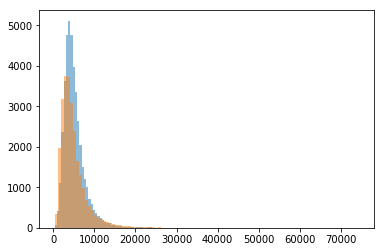

In [6]:
plt.hist(train[train['signal']==1]['pt'],bins=100,alpha=0.5)
plt.hist(train[train['signal']==0]['pt'],bins=100,alpha=0.5)

(array([3.000e+00, 3.090e+02, 1.334e+03, 1.816e+03, 2.036e+03, 1.919e+03,
        1.790e+03, 1.633e+03, 1.491e+03, 1.339e+03, 1.140e+03, 1.011e+03,
        9.490e+02, 8.080e+02, 6.930e+02, 6.560e+02, 5.400e+02, 4.690e+02,
        4.400e+02, 3.960e+02, 3.850e+02, 3.530e+02, 3.050e+02, 2.850e+02,
        2.890e+02, 2.570e+02, 2.360e+02, 2.110e+02, 1.910e+02, 1.710e+02,
        1.430e+02, 1.230e+02, 1.370e+02, 1.210e+02, 9.700e+01, 9.900e+01,
        9.800e+01, 8.900e+01, 9.900e+01, 7.800e+01, 8.600e+01, 6.900e+01,
        7.000e+01, 5.100e+01, 6.000e+01, 4.800e+01, 5.900e+01, 5.100e+01,
        4.200e+01, 4.400e+01, 4.000e+01, 3.400e+01, 2.800e+01, 3.000e+01,
        2.500e+01, 3.600e+01, 2.700e+01, 3.100e+01, 2.200e+01, 7.000e+00,
        2.100e+01, 3.000e+01, 2.000e+01, 1.700e+01, 1.400e+01, 2.200e+01,
        1.400e+01, 1.900e+01, 4.000e+00, 9.000e+00, 1.700e+01, 7.000e+00,
        1.700e+01, 7.000e+00, 9.000e+00, 1.000e+01, 1.500e+01, 9.000e+00,
        5.000e+00, 9.000e+00, 8.000e+0

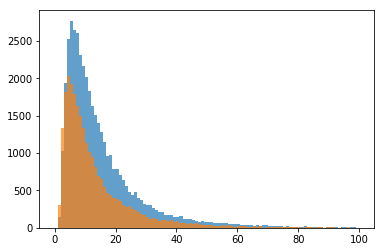

In [7]:
plt.hist(train[train['signal']==1]['FlightDistance'],range=(0,100),bins=100,alpha=0.7)
plt.hist(train[train['signal']==0]['FlightDistance'],range=(0,100),bins=100,alpha=0.7)

(array([3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 2.000e+00, 3.000e+00,
        5.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        5.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 2.000e+00,
        5.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 6.000e+00,
        5.000e+00, 7.000e+00, 1.300e+01, 9.000e+00, 7.000e+00, 5.000e+00,
        8.000e+00, 7.000e+00, 1.100e+01, 1.100e+01, 5.000e+00, 8.000e+00,
        1.000e+01, 1.000e+01, 1.100e+01, 1.400e+01, 1.500e+01, 1.100e+01,
        1.600e+01, 1.700e+01, 1.800e+01, 1.500e+01, 2.400e+01, 2.200e+01,
        1.400e+01, 2.800e+01, 2.100e+01, 2.000e+01, 3.900e+01, 3.000e+01,
        2.400e+01, 3.100e+01, 2.800e+01, 4.500e+01, 3.900e+01, 5.300e+01,
        4.800e+01, 6.900e+01, 5.000e+0

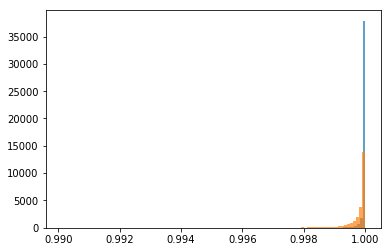

In [8]:
plt.hist(train[train['signal']==1]['dira'],bins=100,alpha=0.7)
plt.hist(train[train['signal']==0]['dira'],bins=100,alpha=0.7)

(array([129., 192., 232., 266., 324., 317., 299., 325., 349., 350., 331.,
        355., 338., 356., 343., 361., 347., 316., 323., 345., 338., 372.,
        333., 363., 316., 304., 337., 308., 343., 323., 317., 302., 325.,
        314., 292., 264., 281., 286., 282., 276., 268., 255., 253., 238.,
        284., 266., 272., 270., 270., 238., 278., 283., 253., 254., 248.,
        260., 220., 221., 255., 218., 249., 241., 249., 228., 231., 211.,
        249., 224., 218., 254., 237., 215., 228., 241., 200., 218., 214.,
        212., 189., 212., 189., 193., 185., 228., 202., 188., 191., 186.,
        207., 181., 187., 174., 179., 197., 179., 202., 180., 187., 160.,
        186.]),
 array([1.04474779e-02, 1.60329413e-01, 3.10211349e-01, 4.60093284e-01,
        6.09975219e-01, 7.59857155e-01, 9.09739090e-01, 1.05962103e+00,
        1.20950296e+00, 1.35938490e+00, 1.50926683e+00, 1.65914877e+00,
        1.80903070e+00, 1.95891264e+00, 2.10879457e+00, 2.25867651e+00,
        2.40855844e+00, 2.5584

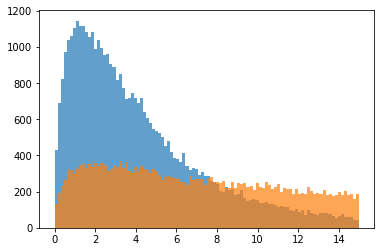

In [9]:
plt.hist(train[train['signal']==1]['VertexChi2'],bins=100,alpha=0.7)
plt.hist(train[train['signal']==0]['VertexChi2'],bins=100,alpha=0.7)

(array([ 54., 159., 251., 301., 346., 416., 436., 460., 471., 495., 549.,
        553., 552., 631., 611., 645., 659., 632., 648., 634., 575., 591.,
        590., 636., 593., 595., 613., 615., 600., 557., 538., 552., 536.,
        523., 506., 485., 472., 442., 421., 398., 401., 302., 329., 324.,
        290., 269., 272., 243., 196., 204., 202., 164., 164., 150., 132.,
        119., 131., 115., 105., 106.,  86.,  72.,  81.,  74.,  77.,  64.,
         70.,  59.,  53.,  44.,  56.,  38.,  26.,  25.,  32.,  39.,  25.,
         37.,  27.,  20.,  26.,  20.,  20.,  12.,  14.,  22.,  16.,   9.,
          9.,  14.,   9.,  17.,  12.,   9.,   8.,   7.,   6.,   6.,   6.,
          3.]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
        0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
        0.18 , 0.185, 0.19 , 0.195

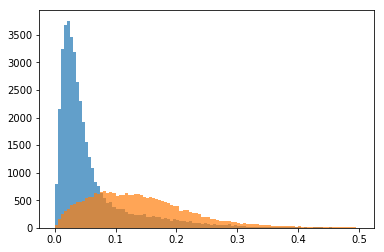

In [10]:
plt.hist(train[train['signal']==1]['IP'],range=(0,0.5),bins=100,alpha=0.7)
plt.hist(train[train['signal']==0]['IP'],range=(0,0.5),bins=100,alpha=0.7)

(array([1.0355e+04, 3.7920e+03, 4.0350e+03, 3.1270e+03, 1.6280e+03,
        1.1560e+03, 7.4500e+02, 4.0700e+02, 2.4500e+02, 1.6200e+02,
        9.2000e+01, 5.2000e+01, 3.2000e+01, 2.3000e+01, 9.0000e+00,
        5.0000e+00, 3.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

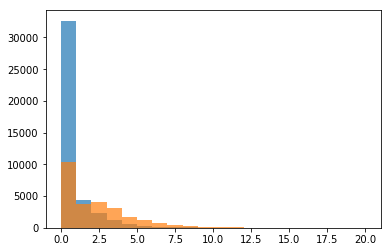

In [11]:
plt.hist(train[train['signal']==1]['iso'],range=(0,20),bins=20,alpha=0.7)
plt.hist(train[train['signal']==0]['iso'],range=(0,20),bins=20,alpha=0.7)

(array([5.336e+03, 9.062e+03, 5.348e+03, 2.741e+03, 1.487e+03, 8.050e+02,
        4.410e+02, 2.530e+02, 1.560e+02, 8.300e+01, 5.900e+01, 4.000e+01,
        1.600e+01, 2.000e+01, 5.000e+00, 5.000e+00, 8.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.00014373, 0.00058354, 0.00102336, 0.00146317, 0.00190298,
        0.0023428 , 0.00278261, 0.00322242, 0.00366223, 0.00410205,
        0.00454186, 0.00498167, 0.00542149, 0.0058613 , 0.00630111,
        0.00674092, 0.00718074, 0.00762055, 0.00806036, 0.00850018,
        0.00893999, 0.0093798 , 0.00981962, 0.01025943, 0.01069924,
        0.01113905, 0.01157887, 0.01

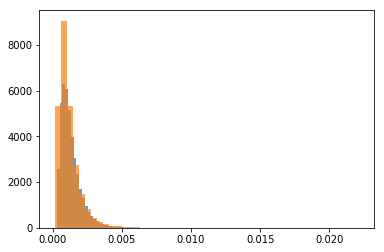

In [12]:
plt.hist(train[train['signal']==1]['LifeTime'],bins=50,alpha=0.7)
plt.hist(train[train['signal']==0]['LifeTime'],bins=50,alpha=0.7)

In [13]:
import keras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
#https://keras.io/getting-started/sequential-model-guide/
#Dropout is like regularization, we eliminate 50% (in this code)
#of the data (not the input layer) so that the NN does not ct
#as a hash table


import keras.layers as klc
import keras.models as klm

    
def make_model(n,m,l):
    model=klm.Sequential([
        klc.Dense(n,activation='relu'),
        klc.Dense(m,activation='relu'),
        klc.Dropout(0.5),
        klc.Dense(m,activation='relu'),
        klc.Dropout(0.5),
        klc.Dense(l,activation='relu'),
        klc.Dropout(0.5),
        klc.Dense(l,activation='relu'),
        klc.Dropout(0.5),
        klc.Dense(2,activation='softmax')
    ])

    model.compile(optimizer='adam',
         loss='categorical_crossentropy',
         metrics=['accuracy'])
    
    return model



In [21]:
from sklearn.model_selection import train_test_split 

y=pd.get_dummies(train['signal'])
X=train.drop(['id', 'signal','mass','production','min_ANNmuon'],axis=1)


X_t, X_v, y_t, y_v =train_test_split(X,y,)
print(X_t.shape)

(50664, 46)


In [22]:
mean=X_t.mean(axis=0)
std=X_t.std(axis=0)

X_t=(X_t-mean)/std
X_v=(X_v-mean)/std


In [23]:
#X.dtypes

In [30]:
#model=make_model(40,32,20)

m_choices=(20,30)
n_choices=(15,10)
l_choices=(10,5)

for m in m_choices:
    for n in n_choices:
        for l in l_choices:
            model=make_model(m,n,l)
            model.fit(
                X_t.values, y_t.values, batch_size=256, epochs=40,
                validation_data=(X_v.values, y_v.values), verbose=0,
                
            )
            print(m,n,l,model.evaluate(X_v.values,y_v.values))
            
            

16889/16889 [==============================] - 0s 25us/step
20 15 10 [0.28966407063880617, 0.8832376102400585]
16889/16889 [==============================] - 0s 22us/step
20 15 5 [0.35926622082803267, 0.8713955828920338]
16889/16889 [==============================] - 0s 25us/step
20 10 10 [0.3309622418888227, 0.8752442418071402]
16889/16889 [==============================] - 0s 25us/step
20 10 5 [0.3513961453598454, 0.8692640179928232]
16889/16889 [==============================] - 0s 26us/step
30 15 10 [0.33684054705613714, 0.8756587127645681]
16889/16889 [==============================] - 0s 29us/step
30 15 5 [0.35731361909886433, 0.8697969092238019]
16889/16889 [==============================] - 0s 28us/step
30 10 10 [0.28093373710897834, 0.8861981171105922]
16889/16889 [==============================] - 1s 32us/step
30 10 5 [0.31771542320448254, 0.8796850020652964]


In [34]:
#factor: how much we decrease learning rate
#after 20 epoches it will stop runnun
#callbacks: ReduceLROnPlateau: reducing learning rate

model=make_model(40,20,20)
model.fit(
    X_t.values, y_t.values, batch_size=256, epochs=9999,
    validation_data=(X_v.values, y_v.values), verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=20),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1),
        keras.callbacks.ModelCheckpoint('./testmodel', monitor='val_loss', save_best_only=True, verbose=1)
    ]
)
print(m,n,l,model.evaluate(X_v.values,y_v.values))




Train on 50664 samples, validate on 16889 samples
Epoch 1/9999
50664/50664 [==============================] - 3s 56us/step - loss: 0.6496 - acc: 0.6079 - val_loss: 0.5398 - val_acc: 0.7202

Epoch 00001: val_loss improved from inf to 0.53983, saving model to ./testmodel
Epoch 2/9999
50664/50664 [==============================] - 1s 18us/step - loss: 0.4934 - acc: 0.7686 - val_loss: 0.3734 - val_acc: 0.8512

Epoch 00002: val_loss improved from 0.53983 to 0.37344, saving model to ./testmodel
Epoch 3/9999
50664/50664 [==============================] - 1s 18us/step - loss: 0.4161 - acc: 0.8348 - val_loss: 0.3387 - val_acc: 0.8666

Epoch 00003: val_loss improved from 0.37344 to 0.33868, saving model to ./testmodel
Epoch 4/9999
50664/50664 [==============================] - 1s 20us/step - loss: 0.3866 - acc: 0.8528 - val_loss: 0.3297 - val_acc: 0.8719

Epoch 00004: val_loss improved from 0.33868 to 0.32967, saving model to ./testmodel
Epoch 5/9999
50664/50664 [==============================] 

50664/50664 [==============================] - 1s 20us/step - loss: 0.2944 - acc: 0.8891 - val_loss: 0.2751 - val_acc: 0.8880

Epoch 00040: val_loss did not improve from 0.27295
Epoch 41/9999
50664/50664 [==============================] - 1s 21us/step - loss: 0.2939 - acc: 0.8881 - val_loss: 0.2741 - val_acc: 0.8876

Epoch 00041: val_loss did not improve from 0.27295
Epoch 42/9999
50664/50664 [==============================] - 1s 22us/step - loss: 0.2946 - acc: 0.8884 - val_loss: 0.2751 - val_acc: 0.8866

Epoch 00042: val_loss did not improve from 0.27295
Epoch 43/9999
50664/50664 [==============================] - 1s 22us/step - loss: 0.2942 - acc: 0.8884 - val_loss: 0.2735 - val_acc: 0.8857

Epoch 00043: val_loss did not improve from 0.27295
Epoch 44/9999
50664/50664 [==============================] - 1s 19us/step - loss: 0.2926 - acc: 0.8895 - val_loss: 0.2728 - val_acc: 0.8869

Epoch 00044: val_loss improved from 0.27295 to 0.27283, saving model to ./testmodel
Epoch 45/9999
50664/5